# Lecture 11: Introduction to clustering

## Introduction to Clustering

Clustering is an unsupervised machine learning technique used to group similar data points into clusters based on their features. Unlike supervised learning, clustering does not rely on labeled data.

**Unsupervised learning**

### Applications of Clustering
- Customer segmentation in marketing
- Image segmentation
- Document categorization
- Anomaly detection
- Biological data analysis (e.g., gene expression data)



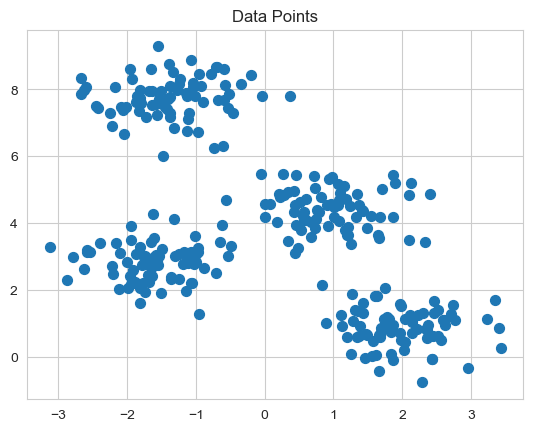

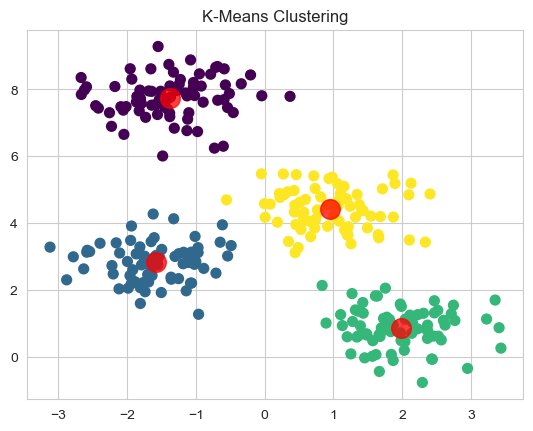

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_style("whitegrid")

# Generate synthetic data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Data Points")
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get cluster labels
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()

---

## Types of Clustering Algorithms

### 1. **K-Means Clustering**
- Partitions data into **K clusters**.
- Each cluster is represented by its centroid.
- Steps:
  1. Initialize K centroids randomly.
  2. Assign each point to the nearest centroid.
  3. Update centroids by averaging points in each cluster.
  4. Repeat until centroids stabilize.

#### Pros:
- Simple and fast.
- Works well with spherical clusters.

#### Cons:
- Requires specifying K in advance.
- Sensitive to outliers.

<img src='img/kmean.gif' img/>


### 2. **Hierarchical Clustering**
- Builds a tree-like structure of clusters (dendrogram).
- Two types:
  - **Agglomerative**: Starts with individual points and merges clusters.
  - **Divisive**: Starts with one cluster and splits it recursively.

#### Pros:
- No need to specify the number of clusters in advance.
- Provides a hierarchy of clusters.

#### Cons:
- Computationally expensive for large datasets.



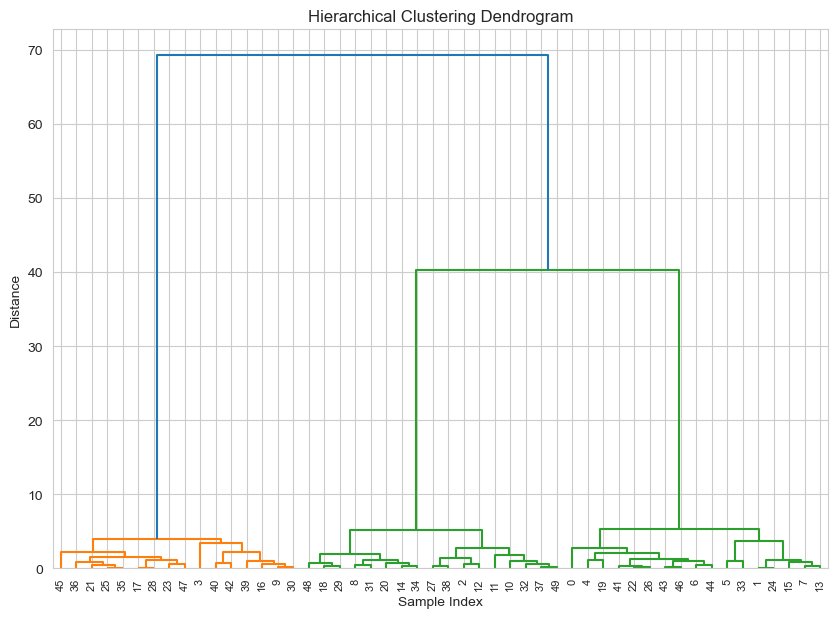

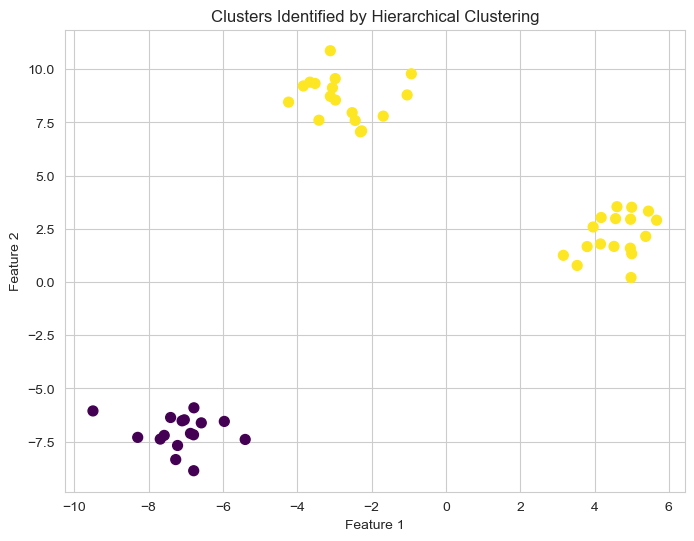

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=1.0, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Ward's method minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Set a threshold to create flat clusters
threshold = 50
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters Identified by Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


---

### 3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
- Groups points that are closely packed together based on density.
- Points in low-density regions are considered noise.

#### Key Parameters:
- `eps`: Maximum distance between points to be in the same cluster.
- `min_samples`: Minimum number of points required to form a dense region.

#### Pros:
- Can find clusters of arbitrary shape.
- Robust to outliers.

#### Cons:
- Requires careful tuning of `eps` and `min_samples`.


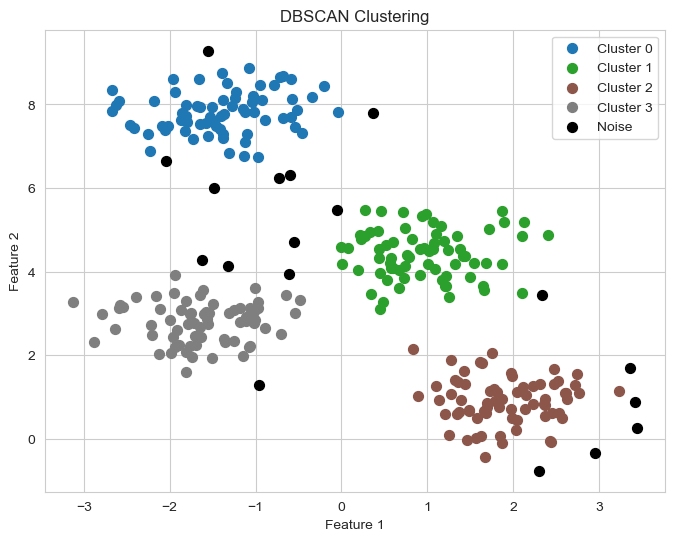

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise
        color = [0, 0, 0, 1]
    
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], s=50, label=f'Cluster {label}' if label != -1 else 'Noise')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



---

## Evaluating Clustering Performance - Ground Truth

When evaluating clustering performance, some metrics require ground truth labels. These metrics measure how well the predicted clusters align with the true class labels. Below are some of the most important metrics with coding examples.

---

## 1. **Adjusted Rand Index (ARI)**

The Adjusted Rand Index measures the similarity between two data clusterings by considering all pairs of points and counting pairs that are correctly clustered. It is adjusted for chance and ranges from -1 (no agreement) to 1 (perfect agreement).

### Code Example:
```python
from sklearn.metrics import adjusted_rand_score

# Ground truth labels
y_true = [0, 0, 1, 1, 2, 2]

# Predicted cluster labels
y_pred = [0, 0, 1, 1, 2, 2]

# Compute ARI
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari:.2f}")
```

---

## 2. **Normalized Mutual Information (NMI)**

Normalized Mutual Information evaluates the amount of information shared between the true labels and predicted clusters. It is normalized to range between 0 (no mutual information) and 1 (perfect correlation).

### Code Example:
```python
from sklearn.metrics import normalized_mutual_info_score

# Ground truth labels
y_true = [0, 0, 1, 1, 2, 2]

# Predicted cluster labels
y_pred = [1, 1, 0, 0, 2, 2]

# Compute NMI
nmi = normalized_mutual_info_score(y_true, y_pred)
print(f"Normalized Mutual Information: {nmi:.2f}")
```

---

## 3. **Homogeneity, Completeness, and V-Measure**

- **Homogeneity**: All clusters contain only points from a single class.
- **Completeness**: All points from a given class are in the same cluster.
- **V-Measure**: Harmonic mean of homogeneity and completeness.

### Code Example:
```python
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Ground truth labels
y_true = [0, 0, 1, 1, 2, 2]

# Predicted cluster labels
y_pred = [1, 1, 0, 0, 2, 2]

# Compute Homogeneity, Completeness, and V-Measure
homogeneity = homogeneity_score(y_true, y_pred)
completeness = completeness_score(y_true, y_pred)
v_measure = v_measure_score(y_true, y_pred)

print(f"Homogeneity: {homogeneity:.2f}")
print(f"Completeness: {completeness:.2f}")
print(f"V-Measure: {v_measure:.2f}")
```

---

## Summary

These metrics provide valuable insights into clustering performance when ground truth labels are available. While ARI and NMI are widely used for general purposes, Homogeneity, Completeness, and V-Measure offer more specific insights into cluster quality. Always choose the metric that aligns with your clustering goals.

In [4]:
from sklearn.metrics import adjusted_rand_score

# Ground truth labels
y_true = [0, 0, 1, 1, 2, 2]

# Predicted cluster labels
y_pred = [0, 0, 1, 1, 2, 2]

# Compute ARI
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari:.2f}")

Adjusted Rand Index: 1.00


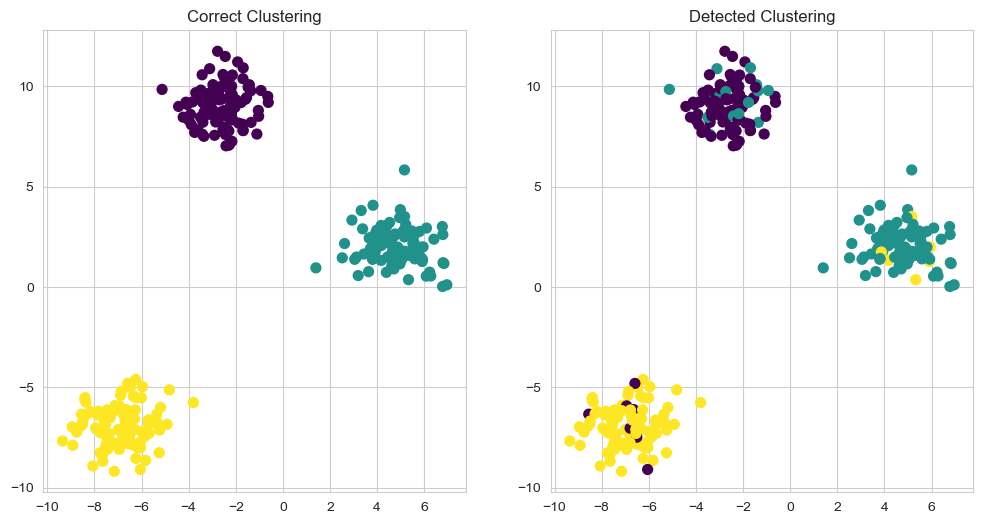

Metrics:
  Adjusted Rand Index: 0.73
  Normalized Mutual Information: 0.71
  Homogeneity: 0.71
  Completeness: 0.71
  V-Measure: 0.71

Modify `y_detected` to see how metrics change.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, homogeneity_score, completeness_score, v_measure_score

# Generate synthetic data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Correct clustering (based on ground truth)
y_correct = y_true

# Incorrect clustering (user can modify this)
y_detected = y_true.copy()
y_detected[::10] = (y_detected[::10] + 1) % 3  # Add some incorrect labels for demonstration

# Define a function to calculate and display metrics
def calculate_metrics(y_true, y_detected):
    ari = adjusted_rand_score(y_true, y_detected)
    nmi = normalized_mutual_info_score(y_true, y_detected)
    homogeneity = homogeneity_score(y_true, y_detected)
    completeness = completeness_score(y_true, y_detected)
    v_measure = v_measure_score(y_true, y_detected)

    print("Metrics:")
    print(f"  Adjusted Rand Index: {ari:.2f}")
    print(f"  Normalized Mutual Information: {nmi:.2f}")
    print(f"  Homogeneity: {homogeneity:.2f}")
    print(f"  Completeness: {completeness:.2f}")
    print(f"  V-Measure: {v_measure:.2f}")

# Plot the clusters
def plot_clusters(X, y1, y2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot correct clustering
    axes[0].scatter(X[:, 0], X[:, 1], c=y1, cmap='viridis', s=50)
    axes[0].set_title("Correct Clustering")

    # Plot detected clustering
    axes[1].scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis', s=50)
    axes[1].set_title("Detected Clustering")

    plt.show()

# Display initial results
plot_clusters(X, y_correct, y_detected)
calculate_metrics(y_correct, y_detected)

# Allow user to modify detected labels
print("\nModify `y_detected` to see how metrics change.")


## Evaluating Clustering Performance - No Ground Truth

When ground truth labels are unavailable, clustering performance can still be evaluated using intrinsic metrics. These metrics measure the quality of clustering based on properties like cohesion (compactness of clusters) and separation (distance between clusters). Below are some of the most important metrics with coding examples.

---

### 1. **Silhouette Score**

The Silhouette Score measures how similar a point is to its own cluster compared to other clusters. It ranges from -1 (poor clustering) to 1 (perfect clustering).

#### Code Example:
```python
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# Compute Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.2f}")
```

---

### 2. **Davies-Bouldin Index**

The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

#### Code Example:
```python
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
db_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")
```

---

### 3. **Calinski-Harabasz Index**

The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, evaluates clustering performance based on the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering.

#### Code Example:
```python
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
```
---

### Summary

These intrinsic metrics provide valuable insights into clustering quality when no ground truth labels are available. While the Silhouette Score and Davies-Bouldin Index focus on compactness and separation, the Calinski-Harabasz Index evaluates the balance of cluster variances. The Elbow Method helps identify the optimal number of clusters visually. Choose the metric that best aligns with your clustering goals.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs
from ipywidgets import interact

# Define a function for clustering and visualization
def clustering_example(std_dev=0.6, n_clusters=4):
    # Generate synthetic data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=std_dev, random_state=42)

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_

    # Compute clustering metrics
    sil_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)

    # Display metrics
    print("Clustering Metrics:")
    print(f"  Silhouette Score: {sil_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.2f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")

    # Visualize clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title("K-Means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Create interactive widget
interact(clustering_example, std_dev=(0.1, 4.0, 0.4), n_clusters=(2, 10, 1))


interactive(children=(FloatSlider(value=0.6, description='std_dev', max=4.0, min=0.1, step=0.4), IntSlider(val…

<function __main__.clustering_example(std_dev=0.6, n_clusters=4)>


## Hands-On Example: K-Means Clustering in Python

### Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### Generate synthetic data

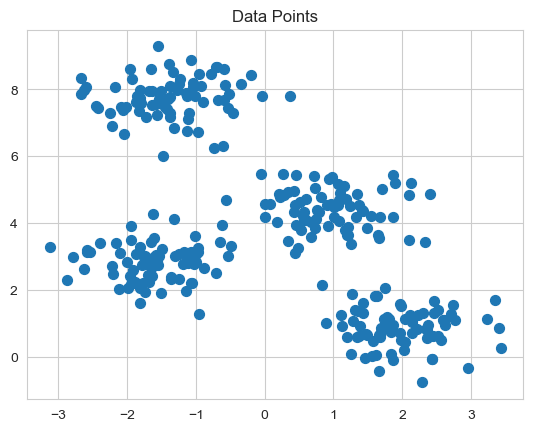

In [8]:

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Data Points")
plt.show()


### Apply K-Means

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

### Get cluster labels

In [10]:
y_kmeans = kmeans.predict(X)

### Visualize

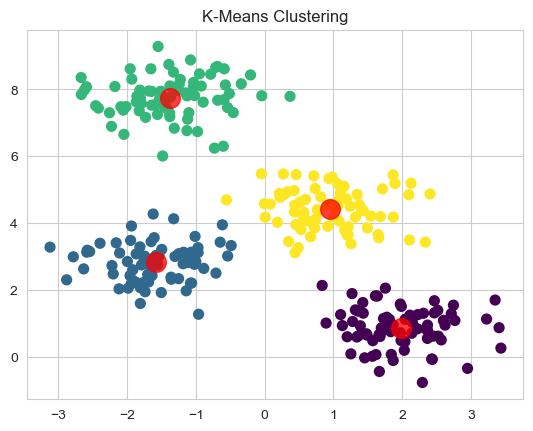

In [11]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()



## Summary
- Clustering is an unsupervised learning technique used to group data points.
- Common algorithms include K-Means, Hierarchical Clustering, and DBSCAN.
- Use appropriate evaluation metrics to assess clustering performance.

---

## Further Reading
- [Scikit-learn documentation on clustering](https://scikit-learn.org/stable/modules/clustering.html)
- "Pattern Recognition and Machine Learning" by Christopher M. Bishop.
